# Versión C – Predicción de Diabetes

## Instrucciones para Examen

**Objetivo**

Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de diabetes. Utilizaremos el «Diabetes Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

**Contexto y Descripción del Dataset**

El «Diabetes Dataset» contiene datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU. La tarea es predecir si un paciente tiene diabetes o no, basándose en ciertas medidas diagnósticas incluidas en el dataset.

Diccionario de Datos:
- Pregnancies: Número de embarazos.
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.
- BloodPressure: Presión arterial diastólica (mm Hg).
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm).
- Insulin: Niveles séricos de insulina a las 2 horas (mu U/ml).
- BMI: Índice de masa corporal (peso en kg / (altura en m)^2).
- DiabetesPedigreeFunction: Función de pedigrí de diabetes.
- Age: Edad (años).
- Outcome: Variable objetivo (1: diabetes, 0: no diabetes).

**Requisitos**

Limpieza de Datos:
- Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
- Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
- Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
- Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

Exploración de Datos:
- Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
- Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

Implementación de Modelos:
- Modelos de Clasificación: Implementa modelos de Random Forest y XGBoost.
- Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
- Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

**Entrega**

Los estudiantes deben entregar un archivo .ipynb comentado que incluya:
- Proceso completo de limpieza y preprocesamiento de datos.
- Visualizaciones y estadísticas descriptivas.
- Implementación y evaluación de los modelos de clasificación.
- Análisis comparativo del rendimiento de los modelos.

Además, el archivo debe subirse a GitHub con un tag de liberación (release tag) que permita identificar la entrega final.

**Consideraciones Éticas y Tecnológicas**

Consideraciones Éticas:
- Transparencia y Reproducibilidad: Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.
- Imparcialidad y Sesgo: Revisa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

Consideraciones Tecnológicas:
- Herramientas Utilizadas: Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.
- Escalabilidad: Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.
- Optimización de Modelos: Aunque este examen no se enfoca en la optimización de hiperparámetros, se debe tener en cuenta para futuras implementaciones y mejorar el rendimiento de los modelos.


## **Configuración**

In [ ]:
#!pip install --upgrade ipywidgets
#!pip install --upgrade jupyter
#!jupyter nbextension install --py widgetsnbextension
#!jupyter nbextension enable --py widgetsnbextension
import kaggle
# Use the Kaggle API to search for datasets kaggle.api.dataset_list()
import kagglehub
# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")
print("Path to dataset files:", path)
# Importar las librerías necesarias
import os
import pandas as pd
import numpy as np
from datetime import datetime
import json
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway,pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

Path to dataset files: /Users/iairlinker/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


In [2]:
# Replace 'diabetes.csv' with the actual file name
dataset_path = os.path.join(path, "diabetes.csv")
df = pd.read_csv(dataset_path)
# Display the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **1. Limpieza de Datos:**

### Manejo de valores faltantes adecuadamente

In [4]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False).head(20)

,datos sin NAs en q,Na en q,Na en %
Pregnancies,768,0,0.0
Glucose,768,0,0.0
BloodPressure,768,0,0.0
SkinThickness,768,0,0.0
Insulin,768,0,0.0
BMI,768,0,0.0
DiabetesPedigreeFunction,768,0,0.0
Age,768,0,0.0
Outcome,768,0,0.0


### Identificación y eliminación de valores duplicados

In [5]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


### Verificación y ajuste de tipos de datos

No se requiere, pues todos vienen ya convertidos a los tipos correctos

### **Corrección de inconsistencias en valores categóricos**

#### Identificación de valores fuera de rango

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Análisis donde cuento cuántos valores de rango tengo

In [19]:
df.loc[df.Insulin==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,374.0,4.433155,3.437621,0.000,1.000,4.0000,7.00000,14.000
Glucose,374.0,119.409091,32.544233,0.000,99.250,115.0000,138.00000,199.000
BloodPressure,374.0,67.473262,24.522312,0.000,64.000,72.0000,80.00000,122.000
SkinThickness,374.0,11.508021,15.738605,0.000,0.000,0.0000,26.75000,99.000
Insulin,374.0,0.000000,0.000000,0.000,0.000,0.0000,0.00000,0.000
BMI,374.0,30.943316,8.419854,0.000,26.500,31.2000,35.67500,52.900
DiabetesPedigreeFunction,374.0,0.415340,0.300547,0.078,0.209,0.3025,0.55325,1.893
Age,374.0,35.796791,12.729034,21.000,25.000,32.0000,43.00000,72.000
Outcome,374.0,0.368984,0.483176,0.000,0.000,0.0000,1.00000,1.000


In [38]:
df.loc[df.Insulin>140].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,164.0,3.609756,3.325883,0.000,1.00000,3.0000,6.00000,14.000
Glucose,164.0,141.091463,27.962248,91.000,121.75000,137.5000,161.25000,198.000
BloodPressure,164.0,72.609756,12.253715,40.000,64.00000,72.0000,82.00000,110.000
SkinThickness,164.0,31.164634,10.128789,7.000,24.75000,32.0000,39.00000,51.000
Insulin,164.0,254.414634,125.231364,142.000,174.00000,206.0000,286.50000,846.000
BMI,164.0,34.923171,6.246684,19.600,30.77500,34.5000,38.47500,57.300
DiabetesPedigreeFunction,164.0,0.591305,0.384756,0.115,0.32475,0.5275,0.74925,2.329
Age,164.0,33.640244,11.532237,21.000,24.00000,30.0000,41.00000,63.000
Outcome,164.0,0.524390,0.500934,0.000,0.00000,1.0000,1.00000,1.000


In [18]:
df.loc[df.SkinThickness==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,227.0,4.638767,3.350062,0.000,2.000,4.000,7.0000,13.000
Glucose,227.0,123.449339,29.572931,44.000,105.000,120.000,140.5000,197.000
BloodPressure,227.0,64.118943,28.839945,0.000,62.000,72.000,80.0000,122.000
SkinThickness,227.0,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000
Insulin,227.0,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000
BMI,227.0,30.129956,9.168249,0.000,25.150,30.400,35.0500,52.900
DiabetesPedigreeFunction,227.0,0.393291,0.276871,0.078,0.203,0.282,0.5365,1.781
Age,227.0,37.251101,13.062933,21.000,27.000,34.000,45.0000,72.000
Outcome,227.0,0.387665,0.488294,0.000,0.000,0.000,1.0000,1.000


In [17]:
df.loc[df.BloodPressure==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,35.0,3.628571,3.646801,0.000,0.0000,2.000,6.0000,13.000
Glucose,35.0,117.800000,27.488821,73.000,97.5000,117.000,133.5000,183.000
BloodPressure,35.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
SkinThickness,35.0,1.514286,6.298326,0.000,0.0000,0.000,0.0000,30.000
Insulin,35.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
BMI,35.0,25.705714,14.874553,0.000,21.6500,28.900,34.5500,52.300
DiabetesPedigreeFunction,35.0,0.388429,0.254266,0.102,0.1975,0.282,0.5735,0.933
Age,35.0,30.714286,9.820661,21.000,24.5000,28.000,34.0000,72.000
Outcome,35.0,0.457143,0.505433,0.000,0.0000,0.000,1.0000,1.000


In [16]:
df.loc[df.Glucose==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,5.0,2.8000,2.489980,1.00,1.000,1.000,5.000,6.000
Glucose,5.0,0.0000,0.000000,0.00,0.000,0.000,0.000,0.000
BloodPressure,5.0,67.6000,12.033287,48.00,68.000,68.000,74.000,80.000
SkinThickness,5.0,29.6000,9.343447,20.00,20.000,32.000,35.000,41.000
Insulin,5.0,4.6000,10.285913,0.00,0.000,0.000,0.000,23.000
BMI,5.0,32.8800,7.033989,24.70,27.700,32.000,39.000,41.000
DiabetesPedigreeFunction,5.0,0.3802,0.215527,0.14,0.299,0.346,0.389,0.727
Age,5.0,28.6000,9.607289,21.00,22.000,22.000,37.000,41.000
Outcome,5.0,0.4000,0.547723,0.00,0.000,0.000,1.000,1.000


#### Decisiones sobre los valores fuera de rango

##### **Glucosa**

/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_42069/659093505.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=aux, palette='Set2')


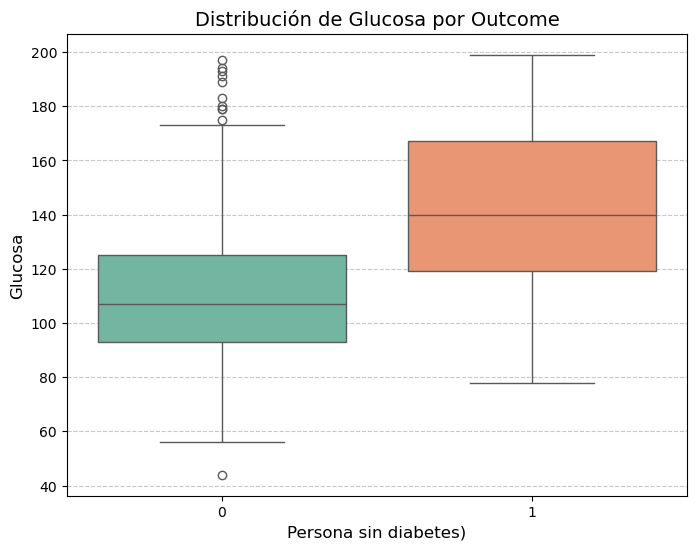

Outcome,0,1
count,497.000000,266.000000
mean,110.643863,142.319549
std,24.776906,29.599199
min,44.000000,78.000000
25%,93.000000,119.000000
50%,107.000000,140.000000
75%,125.000000,167.000000
max,197.000000,199.000000


In [56]:
aux = df.loc[df.Glucose>0]
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=aux, palette='Set2')

# Personalizar el gráfico
plt.title('Distribución de Glucosa por Outcome', fontsize=14)
plt.xlabel('Persona sin diabetes)', fontsize=12)
plt.ylabel('Glucosa', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
aux.groupby(by='Outcome')['Glucose'].describe().T

**Imputamos por la media truncada según outcome**

In [57]:
# Convertir la columna BloodPressure a tipo float
ind = (df.Glucose==0) & (df.Outcome==0)
df.loc[ind,['Glucose']] = 110
ind = (df.Glucose==0) & (df.Outcome==1)
df.loc[ind,['Glucose']] = 142

##### **Presión sanguinea**

/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_42069/1372501276.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BloodPressure', data=aux, palette='Set2')


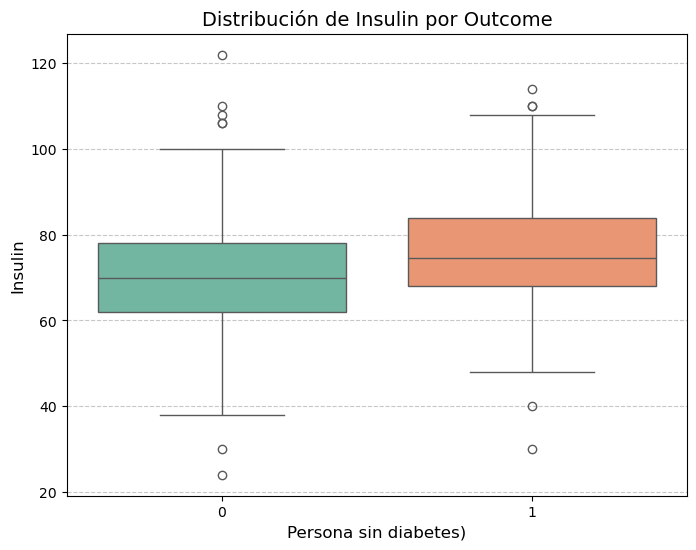

Outcome,0,1
count,478.000000,250.000000
mean,71.910042,107.560000
std,100.013365,140.872206
min,0.000000,0.000000
25%,0.000000,0.000000
50%,45.500000,61.000000
75%,106.000000,175.000000
max,744.000000,846.000000


In [49]:
aux = df.loc[df.BloodPressure>0]
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BloodPressure', data=aux, palette='Set2')

# Personalizar el gráfico
plt.title('Distribución de Insulin por Outcome', fontsize=14)
plt.xlabel('Persona sin diabetes)', fontsize=12)
plt.ylabel('Insulin', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
aux.groupby(by='Outcome')['Insulin'].describe().T

**Imputación por la mediana según si tiene o no diabetes**

In [55]:
# Convertir la columna BloodPressure a tipo float
df['BloodPressure'] = df['BloodPressure'].astype(float)
ind = (df.BloodPressure==0) & (df.Outcome==0)
df.loc[ind,['BloodPressure']] = (45.5)
ind = (df.BloodPressure==0) & (df.Outcome==1)
df.loc[ind,['BloodPressure']] = 61

##### **Insulina**

Como las personas de diabetes tipo 1 pueden tener valores de insulina 0 y las de tipo 2 hiperinsulina, entonces solo vamos a revisar para las personas sin diabetes que no tengan valores anómalos

/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_42069/503809799.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Insulin', data=sin_diabetes, palette='Set2')


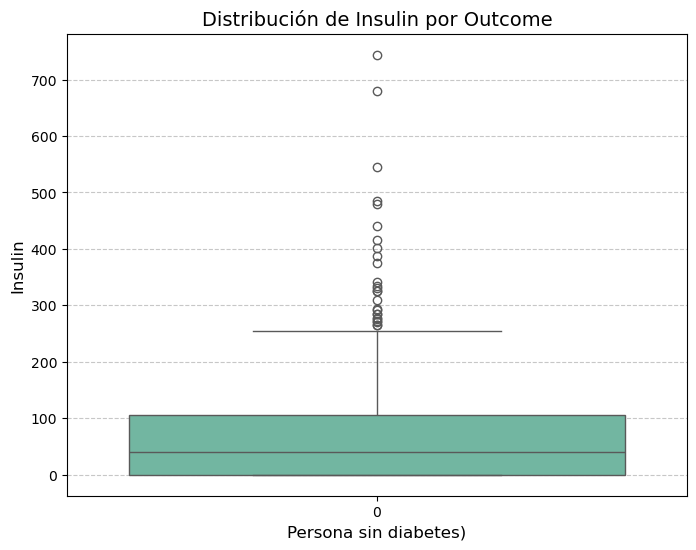

Outcome,0
count,497.000000
mean,69.160966
std,99.045537
min,0.000000
25%,0.000000
50%,40.000000
75%,105.000000
max,744.000000


In [63]:
sin_diabetes = df[df['Outcome'] == 0]
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Insulin', data=sin_diabetes, palette='Set2')

# Personalizar el gráfico
plt.title('Distribución de Insulin por Outcome', fontsize=14)
plt.xlabel('Persona sin diabetes)', fontsize=12)
plt.ylabel('Insulin', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
sin_diabetes.groupby(by='Outcome')['Insulin'].describe().T

**Analizamos los valores extremos**

In [67]:
sin_diabetes[sin_diabetes['Insulin'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,234.0,3.987179,3.294528,0.000,1.00000,3.000,6.0000,13.000
Glucose,234.0,109.730769,24.997171,44.000,92.00000,107.000,123.7500,194.000
BloodPressure,234.0,71.079060,13.859858,44.000,62.00000,71.000,80.0000,122.000
SkinThickness,234.0,11.085470,14.600002,0.000,0.00000,0.000,23.7500,54.000
Insulin,234.0,0.000000,0.000000,0.000,0.00000,0.000,0.0000,0.000
BMI,234.0,28.841880,8.142763,0.000,24.60000,28.700,34.0750,46.200
DiabetesPedigreeFunction,234.0,0.378632,0.280914,0.078,0.19725,0.275,0.4565,1.781
Age,234.0,34.538462,13.381839,21.000,24.00000,29.000,41.7500,72.000
Outcome,234.0,0.000000,0.000000,0.000,0.00000,0.000,0.0000,0.000


In [70]:
sin_diabetes[sin_diabetes['Insulin'] > 100].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,132.0,2.893939,2.823721,0.000,1.000,2.000,4.000,13.000
Glucose,132.0,124.356061,22.298507,82.000,108.000,123.000,137.500,197.000
BloodPressure,132.0,70.151515,11.454847,38.000,62.000,70.000,78.000,100.000
SkinThickness,132.0,28.727273,10.284570,7.000,21.000,29.000,35.000,60.000
Insulin,132.0,195.719697,109.588844,105.000,124.250,162.500,215.000,744.000
BMI,132.0,33.283333,6.887062,19.600,27.775,33.200,38.100,57.300
DiabetesPedigreeFunction,132.0,0.505273,0.343254,0.085,0.254,0.452,0.687,2.329
Age,132.0,29.484848,9.571335,21.000,23.000,26.000,33.250,63.000
Outcome,132.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000


In [94]:
ind = (df['Insulin'] > 0) & (df['Insulin'] < 100)
aux = df[ind]
aux.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,143.0,2.510490,2.469154,0.000,1.0000,2.000,3.000,13.00
Glucose,143.0,100.237762,21.773468,56.000,87.0000,96.000,108.000,180.00
BloodPressure,143.0,68.153846,12.854170,24.000,61.0000,68.000,76.000,106.00
SkinThickness,143.0,26.454545,10.874267,10.000,18.0000,25.000,32.500,63.00
Insulin,143.0,64.664336,20.914630,14.000,49.5000,66.000,82.000,99.00
BMI,143.0,30.630070,7.463744,0.000,25.5000,30.400,34.850,59.40
DiabetesPedigreeFunction,143.0,0.491343,0.325170,0.089,0.2795,0.412,0.642,2.42
Age,143.0,27.335664,7.956700,21.000,22.0000,25.000,29.000,81.00
Outcome,143.0,0.125874,0.332873,0.000,0.0000,0.000,0.000,1.00


**Análisis**

* No se ve una forma clara de hacer imputación, por lo que se evaluará la opción de hacer predicción de la insulina usando como variable explicativa la glucosa

* Se evalua la correlación entre las variables y se define qué variables se usarán para el modelo

In [103]:
aux.corr()['Insulin'].sort_values(ascending=False)

Insulin                     1.000000
Glucose                     0.205931
Outcome                     0.146716
BMI                         0.042463
SkinThickness               0.038576
DiabetesPedigreeFunction    0.005968
Age                         0.005464
Pregnancies                -0.056661
BloodPressure              -0.093427
Name: Insulin, dtype: float64

**Modelo de regresión para los no diabéticos**

12.633308873305305
0.2060445664279391


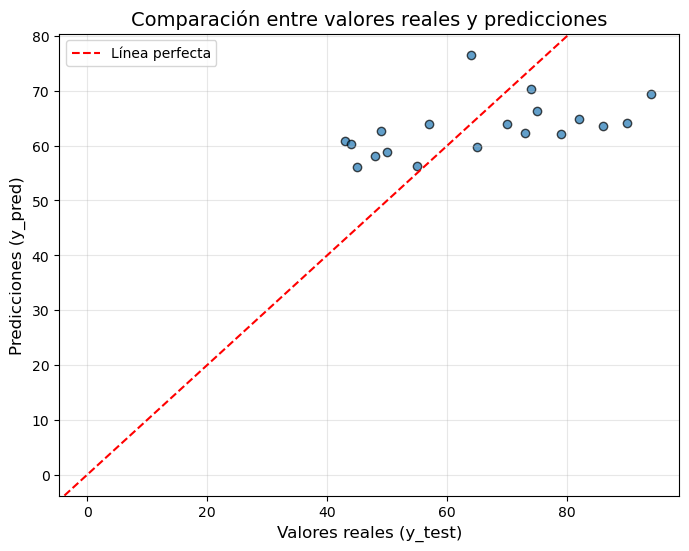

In [ ]:
# Seleccionar las variables explicativas y el target
X = aux[aux['Outcome'] == 0][['Glucose']]
y = aux[aux['Outcome'] == 0]['Insulin']

# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae)
print(r2)

# Crear un gráfico de dispersión entre y_test y y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.title('Comparación entre valores reales y predicciones', fontsize=14)
plt.xlabel('Valores reales (y_test)', fontsize=12)
plt.ylabel('Predicciones (y_pred)', fontsize=12)
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Línea perfecta')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Modelo de regresión para los diabéticos**

10.738408042823885
0.10838132782666765


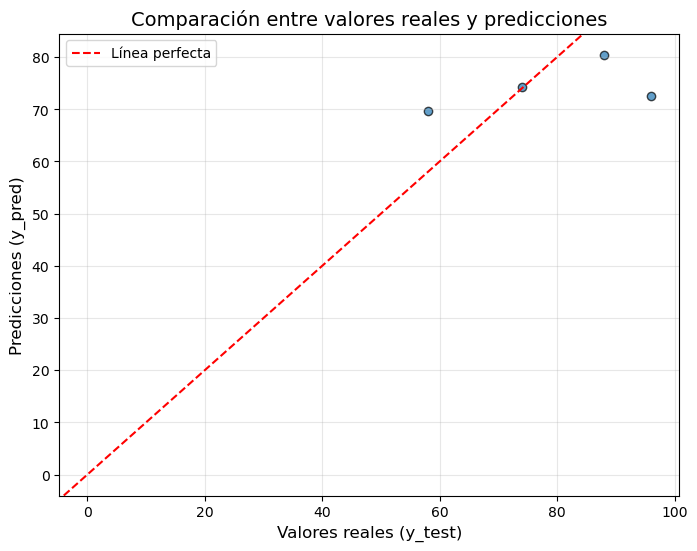

In [102]:
# Seleccionar las variables explicativas y el target
X = aux[aux['Outcome'] == 1][['Glucose']]
y = aux[aux['Outcome'] == 1]['Insulin']

# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae)
print(r2)

# Crear un gráfico de dispersión entre y_test y y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.title('Comparación entre valores reales y predicciones', fontsize=14)
plt.xlabel('Valores reales (y_test)', fontsize=12)
plt.ylabel('Predicciones (y_pred)', fontsize=12)
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Línea perfecta')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

##### **SkinThickness**

In [48]:
aux = df.loc[df.SkinThickness>0]
print(aux.SkinThickness.describe().T)
aux.corr()[['BMI']]

count    536.000000
mean      29.149254
std       10.494686
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64


,BMI
Pregnancies,0.031979
Glucose,0.244174
BloodPressure,0.275438
SkinThickness,0.630818
Insulin,0.191822
BMI,1.000000
DiabetesPedigreeFunction,0.110657
Age,0.089824
Outcome,0.302927


6.829249746746083
0.5321898739476401


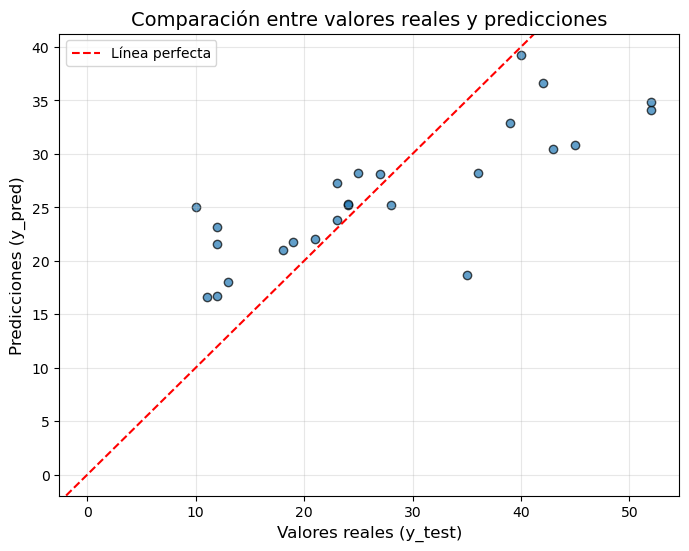

In [93]:
# Seleccionar las variables explicativas y el target
X = aux[['BMI']]
y = aux['SkinThickness']

# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae)
print(r2)

# Crear un gráfico de dispersión entre y_test y y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.title('Comparación entre valores reales y predicciones', fontsize=14)
plt.xlabel('Valores reales (y_test)', fontsize=12)
plt.ylabel('Predicciones (y_pred)', fontsize=12)
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Línea perfecta')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## **2. Exploración de Datos:**

### Visualizaciones univariadas y multivariadas

#### Visualizaciones univariadas

#### Visualizaciones multivariadas

### Estadísticas descriptivas

## **3. Implementación de Modelo: Entrenamiento**

### Modelos de Clasificación

### Evaluación de Modelos

### Comparación de Rendimiento

## **Implementación del modelo: Predicción**